In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

In [2]:
import scipy.io
def load_emnist(file_path='emnist-digits.mat'):
    """
    Loads training and test data with ntr and nts training and test samples
    The `file_path` is the location of the `eminst-balanced.mat`.
    """    
    
    # Load the MATLAB file
    mat = scipy.io.loadmat(file_path)
    
    # Get the training data
    Xtr = mat['dataset'][0][0][0][0][0][0][:]
    ntr = Xtr.shape[0]
    ytr = mat['dataset'][0][0][0][0][0][1][:].reshape(ntr).astype(int)
    
    # Get the test data
    Xts = mat['dataset'][0][0][1][0][0][0][:]
    nts = Xts.shape[0]
    yts = mat['dataset'][0][0][1][0][0][1][:].reshape(nts).astype(int)
    
    print("%d training samples, %d test samples loaded" % (ntr, nts))

    return [Xtr, Xts, ytr, yts]

In [3]:
# TODO:  Load the digit data from emnist-digits.mat
# Xtr_dig, Xts_dig, ytr_dig, yts_dig = ...
Xtr_dig, Xts_dig, ytr_dig, yts_dig = load_emnist()

240000 training samples, 40000 test samples loaded


In [4]:
# TODO:  Load the digit data from emnist-letters.mat
# Xtr_let, Xts_let, ytr_let, yts_let = ...
Xtr_let, Xts_let, ytr_let, yts_let = load_emnist('emnist-letters.mat')

124800 training samples, 20800 test samples loaded


In [5]:
def plt_digit(x,y=None):
    nrow = 28
    ncol = 28
    xsq = x.reshape((nrow,ncol))
    plt.imshow(xsq.T,  cmap='Greys_r')
    plt.xticks([])
    plt.yticks([])    
    if y != None:
        plt.title('%d' % y)

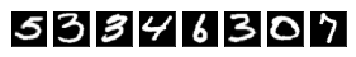

In [6]:
# TODO:  Plot 8 random samples from the training data of the digits
nplt = 8
nsmap = Xtr_dig.shape[0]

Iperm = np.random.permutation(nsmap)

for i in range(nplt):
    ind = Iperm[i]
    plt.subplot(1,nplt, i+1)
    plt_digit(Xtr_dig[ind,:])


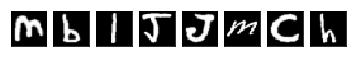

In [7]:
# TODO:  Plot 8 random samples from the training data of the letter
nplt = 8
nsmap = Xtr_let.shape[0]

Iperm = np.random.permutation(nsmap)

for i in range(nplt):
    ind = Iperm[i]
    plt.subplot(1,nplt, i+1)
    plt_digit(Xtr_let[ind,:])



(110400, 784)
(110400,)
(18400, 784)
(18400,)


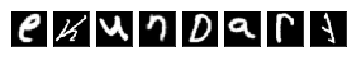

In [9]:
remove_list = np.array([9,12,15])
ytr_let_rem = ytr_let[np.all(ytr_let[:,None]-remove_list, axis=1)]
xtr_let_rem = Xtr_let[np.all(ytr_let[:,None]-remove_list, axis=1)]
print(xtr_let_rem.shape)
print(ytr_let_rem.shape)
yts_let_rem = yts_let[np.all(yts_let[:,None]-remove_list, axis=1)]
xts_let_rem = Xts_let[np.all(yts_let[:,None]-remove_list, axis=1)]
print(xts_let_rem.shape)
print(yts_let_rem.shape)

Iperm = np.random.permutation(nsmap)

for i in range(nplt):
    ind = Iperm[i]
    plt.subplot(1,nplt, i+1)
    plt_digit(xtr_let_rem[ind,:])

In [12]:
# Number of training and test digits and letters
ntr_dig = 5000
ntr_let = 1000
nts_dig = 5000
nts_let = 1000

# TODO Create sub-sampled training and test data
# Xtr1_dig, ytr1_dig = ...
# Xts1_dig, yts1_dig = ...
# Xtr1_let, ytr1_let = ...
# Xts1_let, yts1_let = ...

Xtr1_dig = Xtr_dig[:ntr_dig]
ytr1_dig = ytr_dig[:ntr_dig]
Xts1_dig = Xts_dig[:nts_dig]
yts1_dig = yts_dig[:nts_dig]
Xtr1_let = xtr_let_rem[:ntr_let]
ytr1_let = ytr_let_rem[:ntr_let]
Xts1_let = xts_let_rem[:nts_let]
yts1_let = yts_let_rem[:nts_let]

In [28]:
# TODO:  Create combined letter and digit training and test data
# Xtr, ytr = ..
# Xts, yts = ...
Xtr = np.vstack((Xtr1_dig,Xtr1_let))
Xts = np.vstack((Xts1_dig,Xts1_let))
ytr = np.hstack((ytr1_dig,10*(np.ones(ytr1_let.shape))))
yts = np.hstack((yts1_dig,10*(np.ones(yts1_let.shape))))

In [41]:
Xtr1 = Xtr/255.0*2 - 1
Xts1 = Xts/255.0*2 - 1

In [36]:
from sklearn import svm

# TODO:  Create a classifier: a support vector classifier
# svc = ...
svc = svm.SVC(probability=False,  kernel="rbf", C=2.8, gamma=.0073, verbose=10)

In [37]:
# TODO:  Fit the classifier on the training data.
svc.fit(Xtr1,ytr)

[LibSVM]

SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=10)

In [39]:
# TODO:  Measure error on the test data
yhat_ts = svc.predict(Xts1)
acc = np.mean(yhat_ts == yts)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.916000


[[0.94  0.    0.    0.    0.002 0.002 0.004 0.    0.    0.    0.03 ]
 [0.    0.985 0.    0.    0.    0.    0.    0.    0.    0.    0.007]
 [0.004 0.002 0.901 0.    0.    0.    0.    0.008 0.006 0.    0.042]
 [0.    0.    0.008 0.913 0.    0.012 0.    0.002 0.01  0.    0.025]
 [0.    0.    0.    0.    0.877 0.    0.002 0.    0.    0.011 0.058]
 [0.002 0.    0.    0.008 0.    0.92  0.    0.    0.006 0.    0.032]
 [0.    0.    0.    0.    0.    0.008 0.923 0.    0.002 0.    0.033]
 [0.    0.    0.    0.    0.    0.    0.    0.973 0.    0.011 0.008]
 [0.    0.002 0.002 0.002 0.    0.002 0.    0.    0.885 0.006 0.05 ]
 [0.    0.002 0.    0.    0.    0.    0.    0.015 0.002 0.937 0.021]
 [0.046 0.006 0.038 0.019 0.036 0.    0.047 0.    0.051 0.006 0.872]]


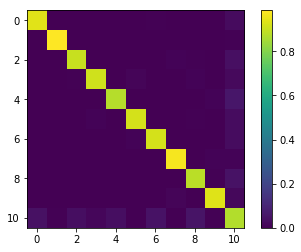

In [46]:
# TODO:  Print a confusion matrix
from sklearn.metrics import confusion_matrix
C = confusion_matrix(yts,yhat_ts)

# Normalize the confusion matrix
Csum = np.sum(C,1)
C = C / Csum[None,:]

# Print the confusion matrix
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

In [50]:
#fraction of digits that are mislabeled as letters
digit_acc=np.sum(C[0:9,10])
print(digit_acc)
#fraction of letters that are mislabeled as digits
letter_acc=np.sum(C[10,0:9])
print(letter_acc)

0.28500000000000003
0.2431848169601035


In [51]:
C_test = [0.1,1,10]
gam_test = [0.001,0.01,0.1]

nC = len(C_test)
ngam = len(gam_test)
acc = np.zeros((nC,ngam))

In [52]:
#GridSearchCV
# TODO:  Create combined trained and test data X and y.
X = np.vstack((Xtr1,Xts1))
y = np.hstack((yts,yts))

In [53]:
from sklearn import model_selection
x1,y1 = Xtr1.shape
x2,y2 = X.shape
test_fold = np.zeros(x2)
test_fold[:x1]=-1
test_fold[x1:]=1
ps = model_selection.PredefinedSplit(test_fold)

In [54]:
param_grid = dict()
param_grid['C'] = C_test
param_grid['gamma'] = gam_test
param_grid['kernel'] = ['rbf']

In [55]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm.SVC(), param_grid, cv=ps, verbose=10)

In [56]:
clf.fit(X, y)

Fitting 1 folds for each of 9 candidates, totalling 9 fits
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.16666666666666666, total= 1.5min
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.16666666666666666, total= 1.6min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.1min remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.16666666666666666, total= 2.9min
[CV] C=1, gamma=0.001, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  7.6min remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.20133333333333334, total=12.7min
[CV] C=1, gamma=0.01, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 20.8min remaining:    0.0s


[CV] ........ C=1, gamma=0.01, kernel=rbf, score=0.2175, total= 1.7min
[CV] C=1, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 23.1min remaining:    0.0s


[CV]  C=1, gamma=0.1, kernel=rbf, score=0.16816666666666666, total= 1.7min
[CV] C=10, gamma=0.001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 25.4min remaining:    0.0s


[CV]  C=10, gamma=0.001, kernel=rbf, score=0.19216666666666668, total= 1.5min
[CV] C=10, gamma=0.01, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 27.5min remaining:    0.0s


[CV]  C=10, gamma=0.01, kernel=rbf, score=0.22266666666666668, total= 5.7min
[CV] C=10, gamma=0.1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 33.8min remaining:    0.0s


[CV]  C=10, gamma=0.1, kernel=rbf, score=0.17016666666666666, total= 1.7min


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 36.0min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 36.0min finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  1,  1])),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [64]:
print("%f is the best score" % (clf.best_score_))
print("The best parameters are as follows")
print(clf.best_params_)

0.222667 is the best score
The best parameters are as follows
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [63]:
print("The mean test scores are as follows")
print(clf.cv_results_['mean_test_score'])
print("The mean train scores are as follows")
print(clf.cv_results_['mean_train_score'])

The mean test scores are as follows
[0.16666667 0.16666667 0.16666667 0.20133333 0.2175     0.16816667
 0.19216667 0.22266667 0.17016667]
The mean train scores are as follows
[0.171      0.17316667 0.16666667 0.25733333 0.88816667 1.
 0.59566667 0.996      1.        ]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
